<a href="https://colab.research.google.com/github/venkataramanik/Supplychain/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚡ Project 6 – Demand Forecasting Using XGBoost

## 🔍 What is XGBoost?

**XGBoost (Extreme Gradient Boosting)** is a powerful machine learning algorithm based on decision trees. It works by building a series of small, optimized trees that **correct the mistakes** of previous ones — making it extremely accurate for tabular data.

Unlike time-series-only models (like ARIMA or Prophet), **XGBoost is a supervised regression model** that can:

- Use **multiple independent features** (not just time)
- Capture **nonlinear patterns and complex interactions**
- Scale to **millions of rows**
- Work well even with **missing or noisy data**

---

## 🧠 Why Use XGBoost for Forecasting?

XGBoost is ideal for **demand forecasting** when you have **structured data** with features like:

- Past demand (lags)
- Product or store info
- Promotions
- Prices
- Holidays
- Weather
- Seasonality (week, month)

---

## 🏭 Industry Use Cases

### 🛍️ Retail & E-Commerce
- Forecast sales for each **SKU in each store** based on promotions, price, season
- Handle complex demand spikes (e.g., flash sales, weekend trends)

### 🏥 Healthcare Supply Chain
- Predict demand for medications or test kits based on flu outbreaks, region, day of week

### 🚚 Logistics & Warehousing
- Forecast **order volume per warehouse** based on location, traffic, carrier behavior

### 🏭 Manufacturing
- Predict raw material demand using lead times, planned orders, external events

---

## 🎯 Supervised Learning Approach

We reframe the problem as a supervised regression task:

| Feature              | Description                     |
|----------------------|---------------------------------|
| `Week_Number`        | Time index (numeric or cyclical)|
| `Is_Promo`           | Promotion flag (0 or 1)         |
| `Price`              | Price offered that week         |
| `Lag_1_Demand`       | Demand last week                |
| `Lag_2_Demand`       | Demand two weeks ago            |
| `Rolling_Mean_4wk`   | 4-week moving average           |
| `Store_ID`           | One-hot encoded or categorical  |
| `Product_ID`         | Product category or SKU         |
| `Demand` (target)    | Forecasting target              |

---

## ✅ What This Project Will Include

- Simulated multi-feature retail demand dataset
- Feature engineering: lag variables, rolling means, date decomposition
- Model training with **XGBoostRegressor**
- Forecast next week's demand
- Evaluation: **MAPE, MAE, RMSE**
- Feature importance analysis (which inputs matter most)

---

📌 Next step: simulate dataset and train XGBoost model.


MAE: 10.60
MAPE: 3.90%


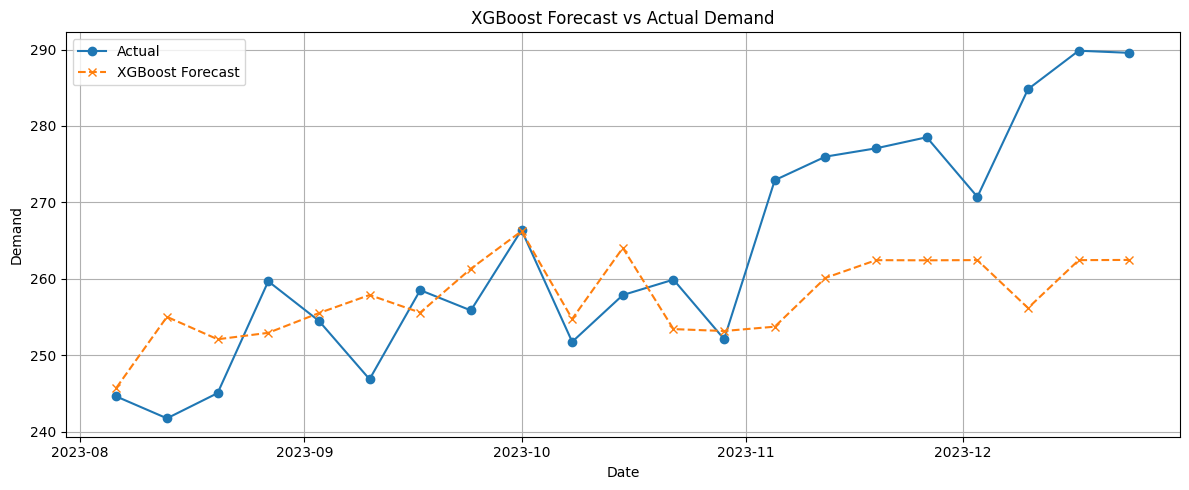

In [1]:
# ⚙️ Install XGBoost
!pip install xgboost --quiet

# 📚 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

# 🧪 Simulate Retail Demand Data (Weekly, 2 Years)
np.random.seed(42)
weeks = pd.date_range(start='2022-01-01', periods=104, freq='W')
trend = np.linspace(100, 300, 104)
seasonality = 20 * np.sin(np.arange(104) * (2 * np.pi / 52))
noise = np.random.normal(0, 10, 104)
base_demand = trend + seasonality + noise
price = np.random.uniform(8, 15, 104)
promo = np.random.binomial(1, 0.3, 104)

df = pd.DataFrame({
    'Date': weeks,
    'Demand': base_demand,
    'Price': price,
    'Is_Promo': promo
})

# 🛠 Feature Engineering
df['Week_Num'] = df['Date'].dt.isocalendar().week.astype(int)
df['Month'] = df['Date'].dt.month
df['Lag_1'] = df['Demand'].shift(1)
df['Lag_2'] = df['Demand'].shift(2)
df['Rolling_Mean_4'] = df['Demand'].rolling(4).mean()
df.dropna(inplace=True)

# 🎯 Define Features and Target
features = ['Price', 'Is_Promo', 'Week_Num', 'Month', 'Lag_1', 'Lag_2', 'Rolling_Mean_4']
target = 'Demand'

X = df[features]
y = df[target]

# 📊 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🧠 Train XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# 🔍 Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")

# 📈 Plot Forecast vs Actual
plt.figure(figsize=(12, 5))
plt.plot(df['Date'][-len(y_test):], y_test.values, label='Actual', marker='o')
plt.plot(df['Date'][-len(y_test):], y_pred, label='XGBoost Forecast', marker='x', linestyle='--')
plt.title("XGBoost Forecast vs Actual Demand")
plt.xlabel("Date")
plt.ylabel("Demand")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
